In [1]:
#pip install pillow numpy

In [2]:
from PIL import Image
import numpy as np

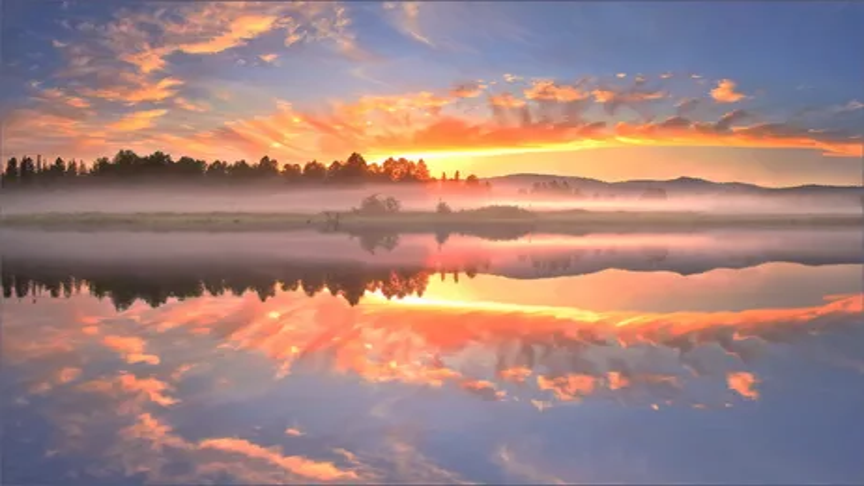

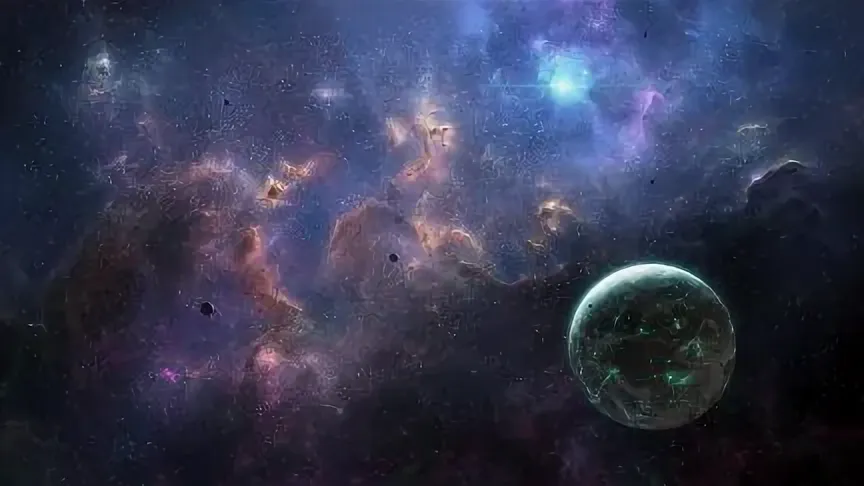

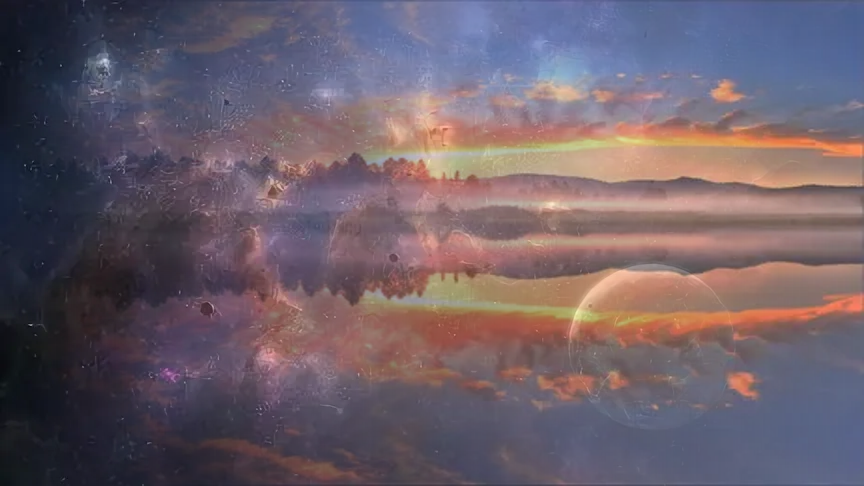

In [3]:
from PIL import Image
import numpy as np
from IPython.display import display

def blend_images(image1_path, image2_path):
    # Открываем изображения
    image1 = Image.open(image1_path).convert("RGBA")
    image2 = Image.open(image2_path).convert("RGBA")

    # Приводим изображения к одному размеру
    image1 = image1.resize(image2.size)

    # Создаем градиентную маску
    width, height = image1.size
    gradient = np.linspace(0, 1, width)
    gradient = np.tile(gradient, (height, 1))

    # Преобразуем маску в изображение
    gradient_image = Image.fromarray(np.uint8(gradient * 255), 'L')

    # Создаем новое изображение, используя маску для смешивания
    blended_image = Image.composite(image1, image2, gradient_image)

    display(image1, image2)

    # Выводим результат
    display(blended_image)
    blended_image.save('sun_space.png')

# Пример использования
blend_images('image_sun.webp', 'small_space.webp')



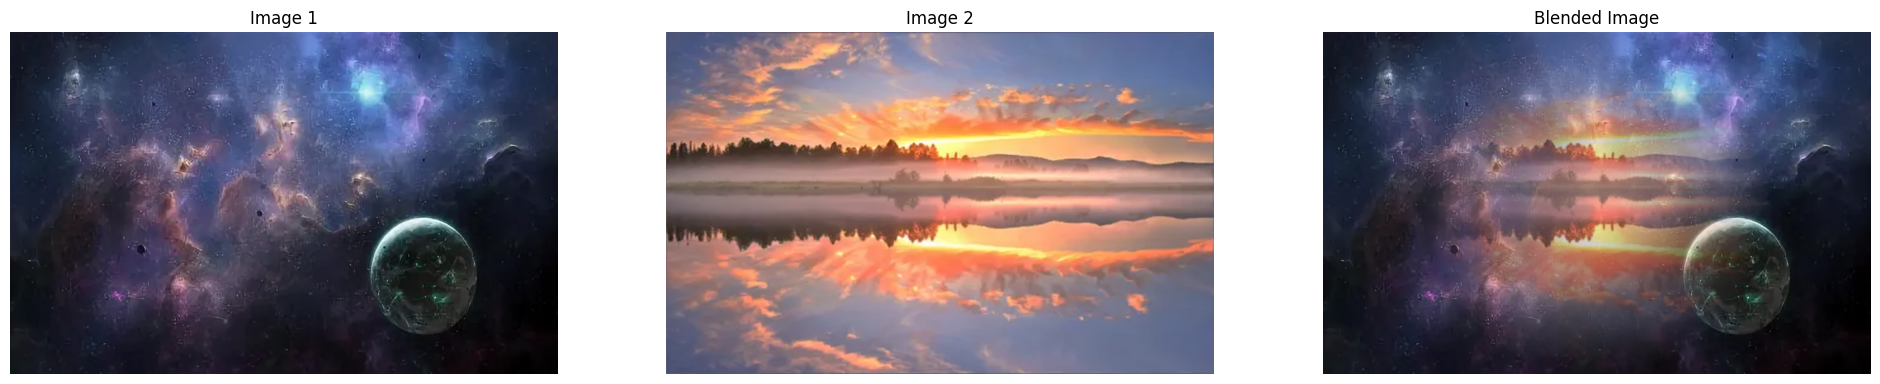

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# Загрузка изображений
image1_path = 'small_space.webp'  
image2_path = 'image_sun.webp' 
size = (800, 500) #размер

def create_radial_gradient(size, center = None, radius = None):
    width, height = size
    if center is None:
        center = (width // 2, height // 2)
    if radius is None:
        radius = min(center[0], center[1], width - center[0], height - center[1])

    gradient = np.zeros((height, width), dtype=np.float32)
    for y in range(height):
        for x in range(width):
            dx = x - center[0]
            dy = y - center[1]
            distance = np.sqrt(dx**2 + dy**2)
            gradient[y, x] = min(distance / radius, 1.0)
    
    return gradient

def blend_images(image1, image2, gradient):
    """
    Смешивает две картинки с использованием градиента.
    """
    gradient_img = Image.fromarray(np.uint8(gradient * 255), 'L')
    gradient_img = gradient_img.resize(image1.size)
    blended_image = Image.composite(image1, image2, gradient_img)
    return blended_image

image1 = Image.open(image1_path).convert("RGBA")
image2 = Image.open(image2_path).convert("RGBA")

# Приведение изображений к одному размеру
image1 = image1.resize(size)
image2 = image2.resize(size)

# Создание радиального градиента
gradient = create_radial_gradient(image1.size)

# Смешивание изображений
blended_image = blend_images(image1, image2, gradient)

# Отображение изображений
plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.title("Image 1")
plt.imshow(image1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Image 2")
plt.imshow(image2)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Blended Image")
plt.imshow(blended_image)
plt.axis('off')

plt.show()

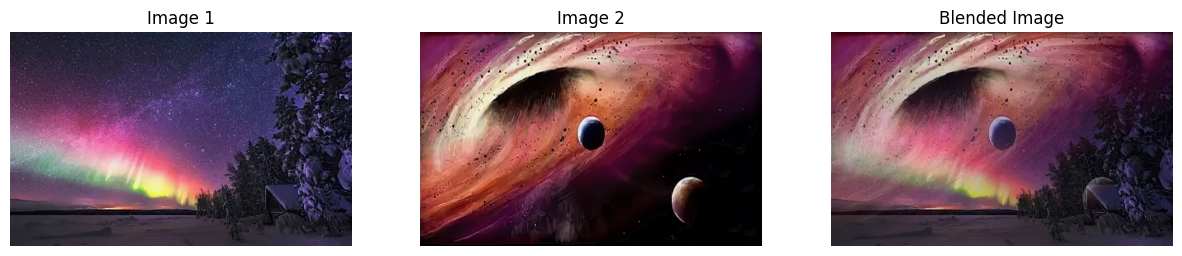

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# Загрузка изображений
image1_path = 'small_north.webp'#'image_mountains.webp'  
image2_path = 'small_black_hole.webp' 
size = (800, 500) #размер

def create_vertical_gradient(size):
    """
    Создает вертикальный градиент с указанным размером.
    """
    width, height = size
    gradient = np.zeros((height, width), dtype=np.float32)
    for y in range(height):
        gradient[y, :] = y / height
    return gradient

def blend_images(image1, image2, gradient):
    """
    Смешивает две картинки с использованием градиента.
    """
    gradient_img = Image.fromarray(np.uint8(gradient * 255), 'L')
    gradient_img = gradient_img.resize(image1.size)
    blended_image = Image.composite(image1, image2, gradient_img)
    return blended_image

image1 = Image.open(image1_path).convert("RGBA")
image2 = Image.open(image2_path).convert("RGBA")
image1 = image1.transpose(Image.FLIP_LEFT_RIGHT) #отзеркаливание

# Приведение изображений к одному размеру
image1 = image1.resize(size)
image2 = image2.resize(size)

# Создание вертикального градиента
gradient = create_vertical_gradient(image1.size)

# Смешивание изображений
blended_image = blend_images(image1, image2, gradient)

# Отображение изображений
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Image 1")
plt.imshow(image1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Image 2")
plt.imshow(image2)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Blended Image")
plt.imshow(blended_image)
plt.axis('off')

plt.show()